In [1]:
import soundfile as sf
import numpy as np # numpyをインポート
import matplotlib.pyplot as plt # matplotlibをインポート
import csv

def extract_subarray(arr, start, end):
    subarray = arr[start:end+1]
    return subarray

def append_to_csv(data, filename):
    with open(filename, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(data)

### 量子化(離散化) ###
f_s = 44100 # サンプリングレート f_s[Hz] (任意)
t_fin = 0.1 # 窓関数の幅 [s] (任意)
dt = 1/f_s # サンプリング周期 dt[s]
N = int(f_s * t_fin) # サンプル数 [個]
Overlap = 0.5 #オーバーラップ率
N_data = int(60/(t_fin*Overlap)) #1分間からいくつのデータがとれるか
hertz = 20000 #何Hzまでのデータを取るか

window = np.hanning(N)

### 入力信号 y(t) ###

fname = ""
if fname == "NC.wav":
    label = 0
if fname == "NB.1.1V.wav":
    label = 1
if fname == "NB.1.4V.wav":
    label = 2
if fname == "NB.2V.wav":
    label = 3

data, samplerate = sf.read(fname)

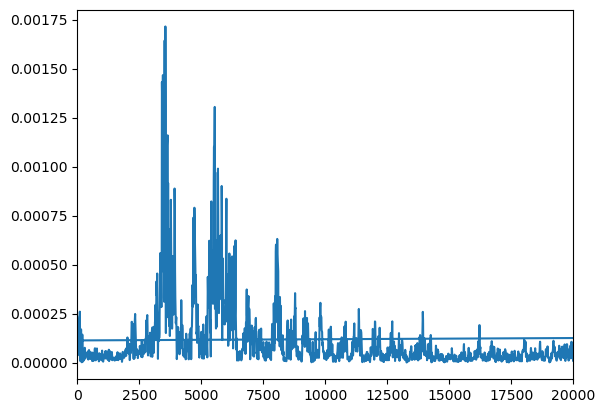

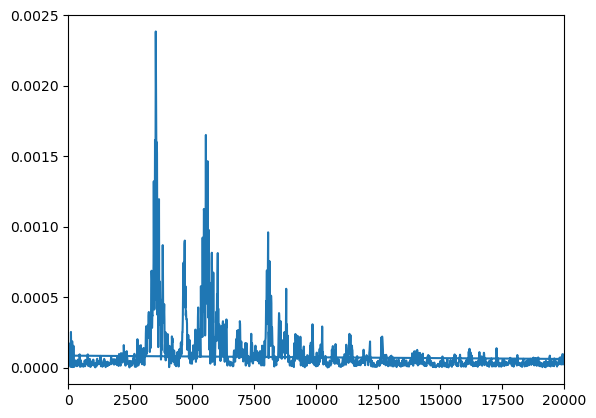

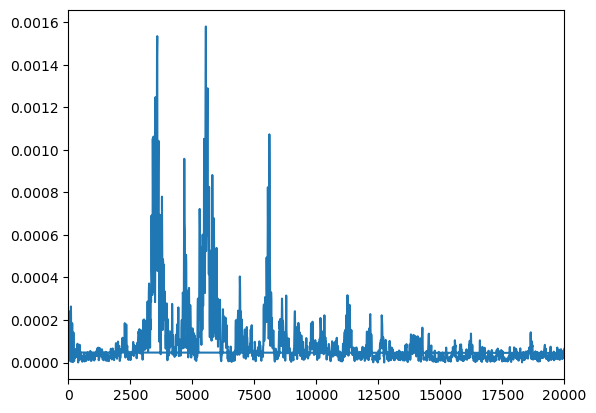

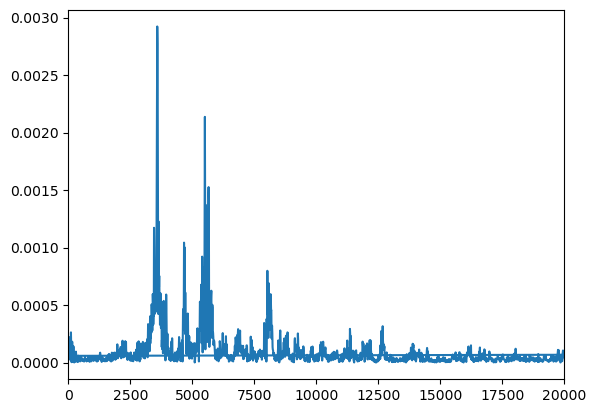

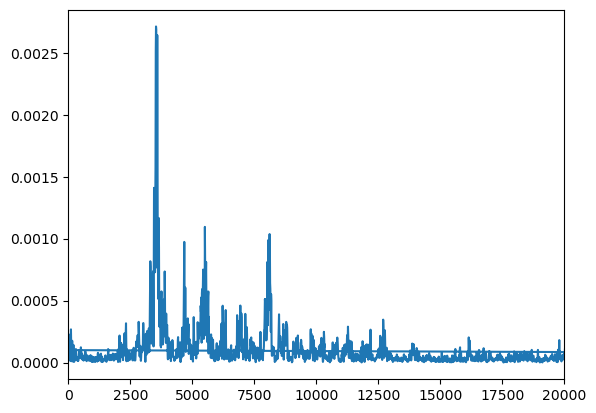

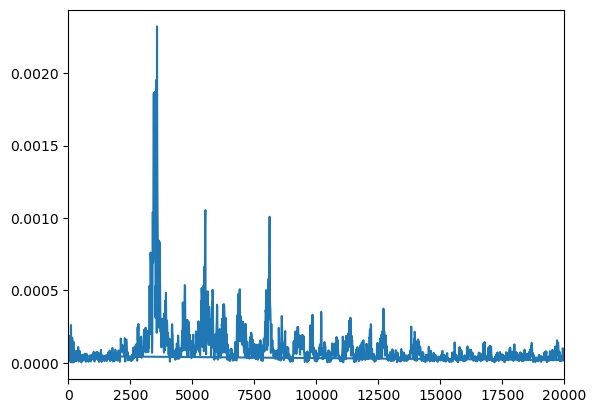

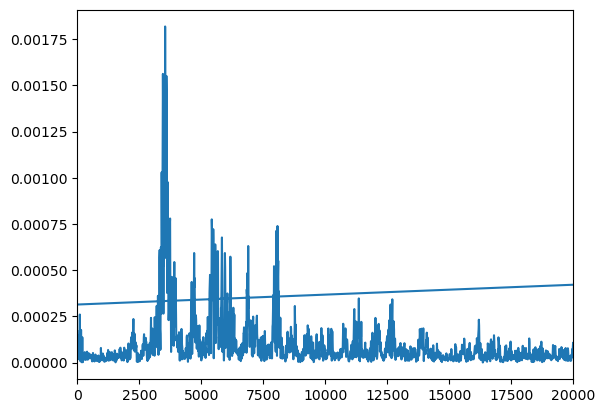

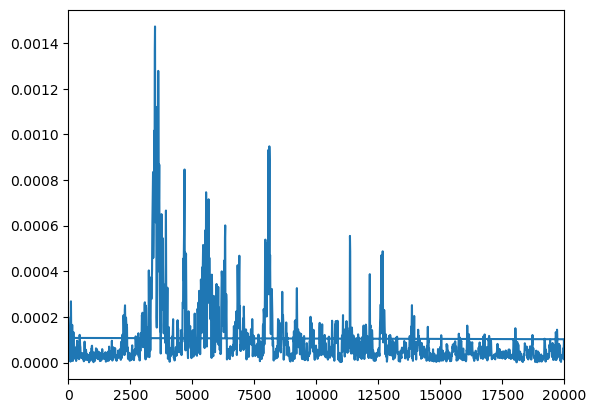

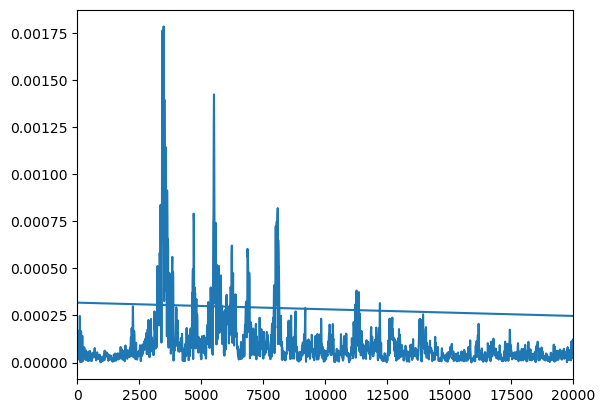

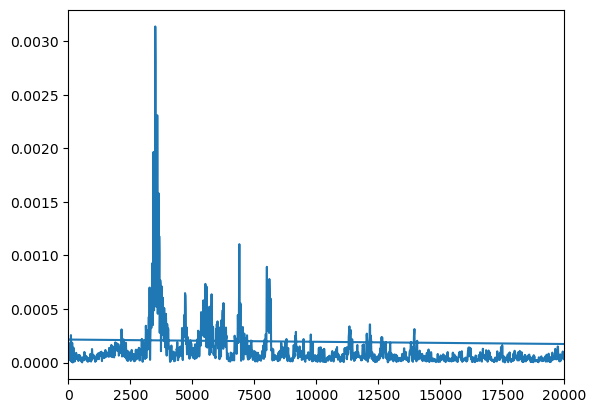

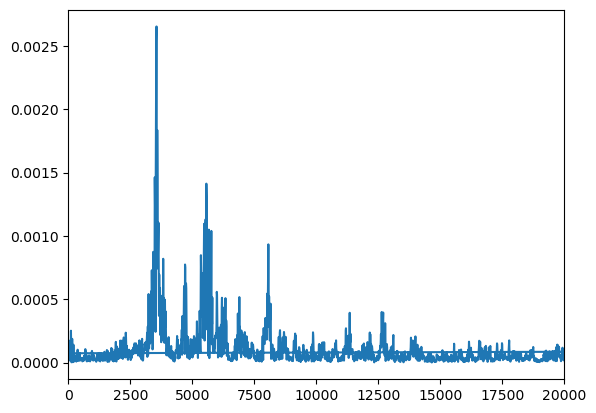

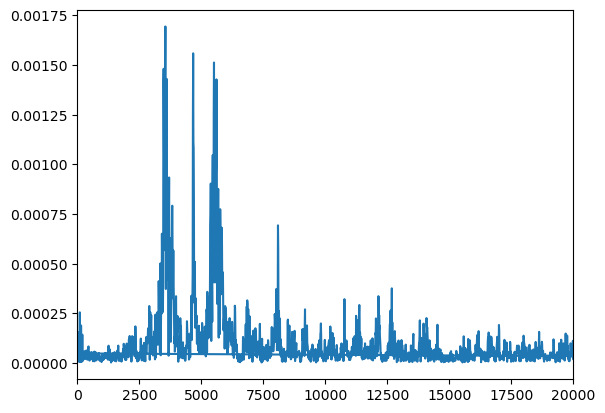

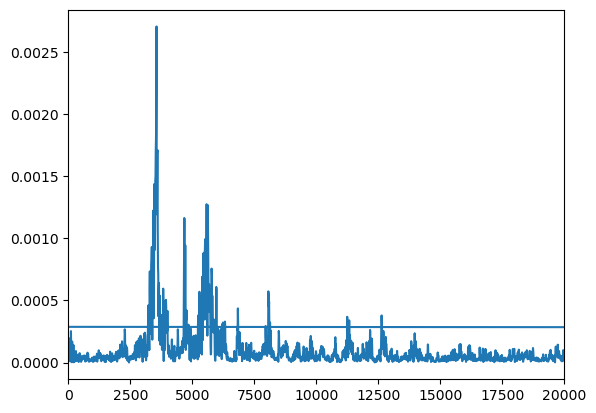

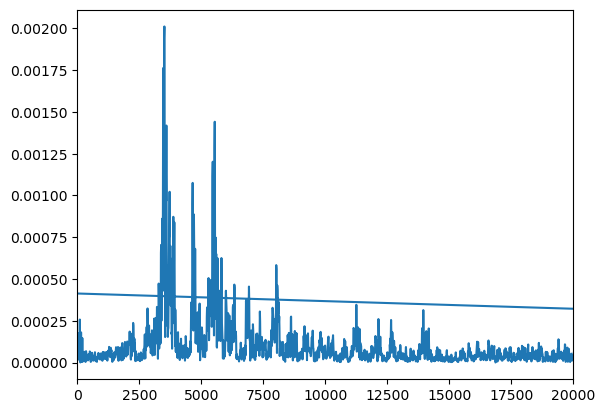

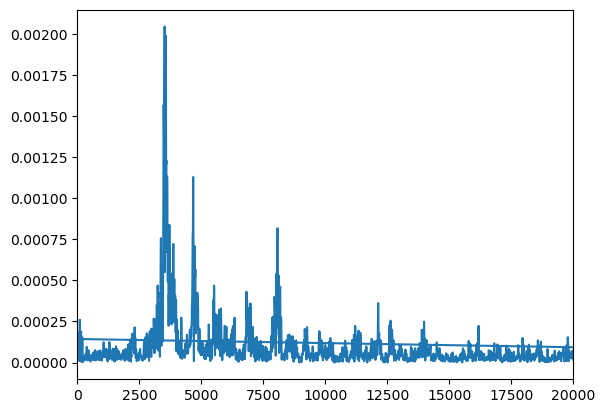

KeyboardInterrupt: 

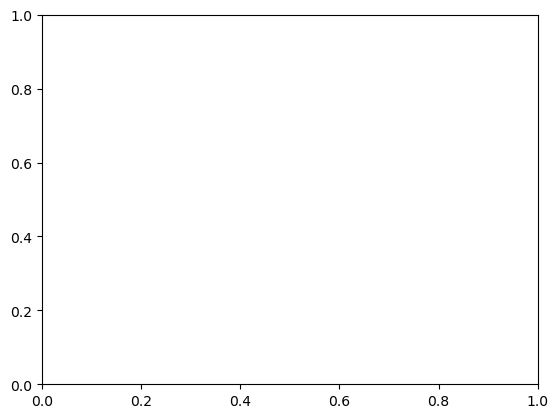

In [2]:
for j in range(N_data):
    A = np.zeros(N)
    for i in range(N):
        A[i] = data[int(N*Overlap*j+i),0]

    ###窓関数の処理###
    windowed_data = (A)*window
    #print(windowed_data)

    ### FFT: tの関数をfの関数にする ###
    y_fft = np.fft.fft(windowed_data) # 離散フーリエ変換
    freq = np.fft.fftfreq(N, d=dt) # 周波数を割り当てる（※後述）
    Amp = abs(y_fft/(N/2)) # 音の大きさ（振幅の大きさ）
    

    # 関数を使って配列の一部を抜き出す
    dataset = extract_subarray(Amp, int(50*t_fin), int(t_fin*hertz))
    
    # 関数を使って配列をプロット
    plt.plot(freq,Amp)
    plt.xlim([0,20000]) #x軸の範囲を1~5に指定
    plt.show()
    
    #dataset[0] = label

    # CSVファイルに配列dataを追記
    #append_to_csv(dataset, '')